In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset.csv")
df

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour
0,CA,INDIVIDUAL,4 years,"Windsor Solutions, Inc.",D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,...,62.006774,0.161206,9586.945180,1.953600,NaN,2021,8,7,5,0
1,PA,INDIVIDUAL,3 years,Grant & Eisenhofer,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,...,373.547998,0.117188,2213.200815,22.458280,12901.399781,2021,4,9,4,0
2,DC,INDIVIDUAL,6 years,VALLEY PLUMBING COMPANY,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,...,529.631006,0.089163,15608.890161,NaN,10082.118704,2021,7,10,5,0
3,WI,INDIVIDUAL,7 years,Housing Investments Inc,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,...,1057.386266,0.171302,16700.391717,2.814647,NaN,2021,10,11,0,0
4,NY,INDIVIDUAL,10+ years,Massage Envy,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,...,510.555677,0.091857,4109.600739,NaN,13485.994361,2021,1,10,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,TX,INDIVIDUAL,4 years,Bath and Body Works,C,MORTGAGE,2021-11-09,2021-02-13,2021-10-14,Fully Paid,...,374.438907,0.153717,10409.513686,26.351786,16376.396218,2021,11,9,1,0
74997,CO,INDIVIDUAL,5 years,B&W,A,RENT,2021-12-11,2021-11-14,2021-03-11,Fully Paid,...,565.528528,0.047282,5688.622795,11.314196,11387.744804,2021,12,11,5,0
74998,CT,INDIVIDUAL,5 years,Motiva Enterprises,F,RENT,2021-10-11,2021-11-14,2021-11-10,Fully Paid,...,360.823876,0.211030,9966.287828,12.771098,26088.288340,2021,10,11,0,0
74999,CA,INDIVIDUAL,6 years,Penmark Management LLC.,C,MORTGAGE,2021-09-11,2021-06-14,2021-10-13,Charged Off,...,368.929932,0.130109,NaN,19.545008,15235.473986,2021,9,11,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_state          75001 non-null  object 
 1   application_type       75001 non-null  object 
 2   emp_length             75001 non-null  object 
 3   emp_title              75001 non-null  object 
 4   grade                  75001 non-null  object 
 5   home_ownership         75001 non-null  object 
 6   issue_date             75001 non-null  object 
 7   last_credit_pull_date  75001 non-null  object 
 8   last_payment_date      75001 non-null  object 
 9   loan_status            75001 non-null  object 
 10  next_payment_date      75001 non-null  object 
 11  member_id              75001 non-null  float64
 12  purpose                75001 non-null  object 
 13  term                   75001 non-null  object 
 14  verification_status    75001 non-null  object 
 15  an

In [4]:
df.describe()

,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour
count,7.500100e+04,67501.000000,63751.000000,71251.000000,60001.000000,67501.000000,67501.000000,56251.000000,75001.0,75001.000000,75001.000000,75001.000000,75001.0
mean,8.640305e+05,75948.832640,0.136321,397.494234,0.152150,14007.703085,22.509181,15494.180602,2021.0,7.154291,10.384262,3.181318,0.0
std,2.543110e+05,63434.809268,0.064982,243.407272,0.055995,8782.891714,12.312632,11643.633459,0.0,3.413656,0.856953,1.929661,0.0
min,-2.805403e+05,-294461.966161,-0.152320,-470.742442,-0.050444,-22068.213300,-38.525663,-31937.824830,2021.0,1.000000,1.000000,0.000000,0.0
25%,6.944521e+05,35288.245569,0.093132,229.230220,0.112169,7879.163712,14.276190,7516.531265,2021.0,4.000000,10.000000,2.000000,0.0
50%,8.662858e+05,75400.804843,0.136576,383.682593,0.154825,13378.452336,22.484164,14241.661213,2021.0,7.000000,11.000000,3.000000,0.0
75%,1.034790e+06,116750.076136,0.180279,553.312134,0.193558,19649.635508,30.649657,22418.619925,2021.0,10.000000,11.000000,5.000000,0.0
max,1.924209e+06,419877.028635,0.463241,1551.686432,0.344403,55775.851091,78.813748,71119.927451,2021.0,12.000000,25.000000,6.000000,0.0


In [5]:
df.isna().sum()

address_state                0
application_type             0
emp_length                   0
emp_title                    0
grade                        0
home_ownership               0
issue_date                   0
last_credit_pull_date        0
last_payment_date            0
loan_status                  0
next_payment_date            0
member_id                    0
purpose                      0
term                         0
verification_status          0
annual_income             7500
dti                      11250
installment               3750
int_rate                 15000
loan_amount               7500
total_acc                 7500
total_payment            18750
issue_date_year              0
issue_date_month             0
issue_date_day               0
issue_date_weekday           0
issue_date_hour              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(['application_type', 'emp_title','issue_date_year','issue_date_month', 'issue_date_day', 'issue_date_weekday', 'issue_date_hour'], axis=1, inplace=True)


In [8]:
df.head()

,address_state,emp_length,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,CA,4 years,D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,2021-07-13,1.251026e+06,Debt consolidation,36 months,Source Verified,82438.124601,0.072151,62.006774,0.161206,9586.945180,1.953600,NaN
1,PA,3 years,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,2022-01-13,2.947135e+05,wedding,36 months,Not Verified,52347.892639,0.140367,373.547998,0.117188,2213.200815,22.458280,12901.399781
2,DC,6 years,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,2021-08-14,6.013015e+05,Debt consolidation,36 months,Verified,-38314.485684,0.125850,529.631006,0.089163,15608.890161,NaN,10082.118704
3,WI,7 years,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,2021-05-15,1.027941e+06,Debt consolidation,60 months,Verified,254889.785659,0.148349,1057.386266,0.171302,16700.391717,2.814647,NaN
4,NY,10+ years,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,2021-02-15,1.087496e+06,credit card,60 months,Verified,NaN,NaN,510.555677,0.091857,4109.600739,NaN,13485.994361


In [9]:
df.drop('member_id', axis=1, inplace=True)

In [10]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].abs()

In [11]:
df

,address_state,emp_length,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,CA,4 years,D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,2021-07-13,Debt consolidation,36 months,Source Verified,82438.124601,0.072151,62.006774,0.161206,9586.945180,1.953600,NaN
1,PA,3 years,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,2022-01-13,wedding,36 months,Not Verified,52347.892639,0.140367,373.547998,0.117188,2213.200815,22.458280,12901.399781
2,DC,6 years,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,2021-08-14,Debt consolidation,36 months,Verified,38314.485684,0.125850,529.631006,0.089163,15608.890161,NaN,10082.118704
3,WI,7 years,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,2021-05-15,Debt consolidation,60 months,Verified,254889.785659,0.148349,1057.386266,0.171302,16700.391717,2.814647,NaN
4,NY,10+ years,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,2021-02-15,credit card,60 months,Verified,NaN,NaN,510.555677,0.091857,4109.600739,NaN,13485.994361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,TX,4 years,C,MORTGAGE,2021-11-09,2021-02-13,2021-10-14,Fully Paid,2021-08-14,Debt consolidation,36 months,Verified,139022.223332,0.237799,374.438907,0.153717,10409.513686,26.351786,16376.396218
74997,CO,5 years,A,RENT,2021-12-11,2021-11-14,2021-03-11,Fully Paid,2021-09-12,medical,60 months,Verified,36642.312324,0.089881,565.528528,0.047282,5688.622795,11.314196,11387.744804
74998,CT,5 years,F,RENT,2021-10-11,2021-11-14,2021-11-10,Fully Paid,2021-06-16,Debt consolidation,60 months,Source Verified,NaN,0.103079,360.823876,0.211030,9966.287828,12.771098,26088.288340
74999,CA,6 years,C,MORTGAGE,2021-09-11,2021-06-14,2021-10-13,Charged Off,2021-02-13,medical,36 months,Verified,123554.693553,0.198773,368.929932,0.130109,NaN,19.545008,15235.473986


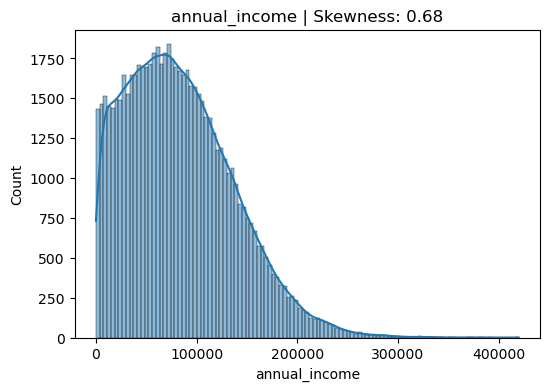

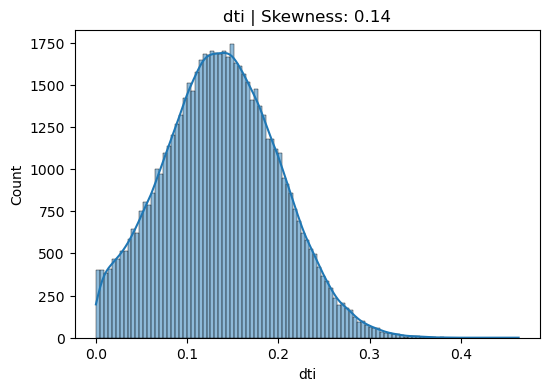

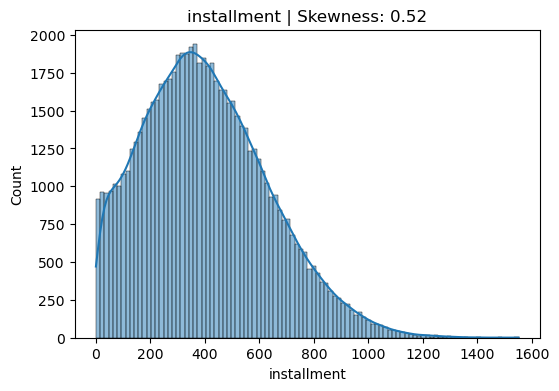

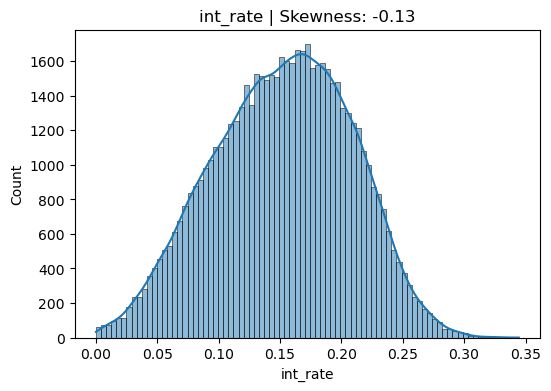

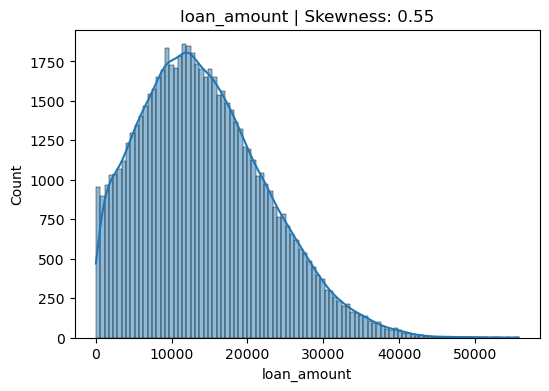

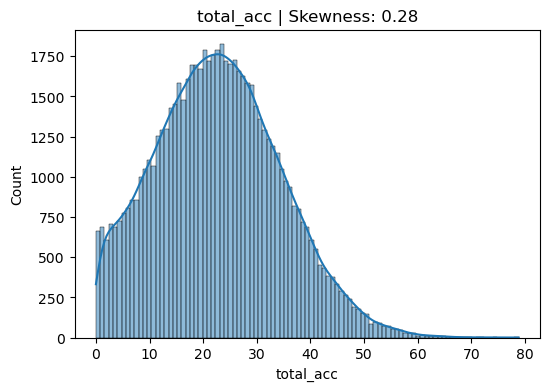

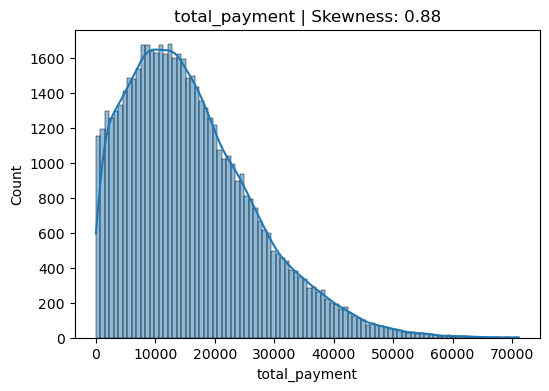

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} | Skewness: {df[col].skew():.2f}")
    plt.show()


In [13]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [14]:
date_cols = ['issue_date', 'last_credit_pull_date','last_payment_date','next_payment_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   address_state          75001 non-null  object        
 1   emp_length             75001 non-null  object        
 2   grade                  75001 non-null  object        
 3   home_ownership         75001 non-null  object        
 4   issue_date             75001 non-null  datetime64[ns]
 5   last_credit_pull_date  75001 non-null  datetime64[ns]
 6   last_payment_date      75001 non-null  datetime64[ns]
 7   loan_status            75001 non-null  object        
 8   next_payment_date      75001 non-null  datetime64[ns]
 9   purpose                75001 non-null  object        
 10  term                   75001 non-null  object        
 11  verification_status    75001 non-null  object        
 12  annual_income          75001 non-null  float64       
 13  d

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_cols = ['emp_length', 'grade', 'term']

for col in label_cols:
    df[col] = le.fit_transform(df[col])

# target
df['loan_status'] = le.fit_transform(df['loan_status'])


In [17]:
onehot_cols = [
    'address_state',
    'home_ownership',
    'purpose',
    'verification_status'
]

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [18]:
df.head()

,emp_length,grade,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,term,annual_income,dti,...,purpose_major purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
0,4,3,2021-08-07,2021-07-15,2021-07-12,1,2021-07-13,0,82438.124601,0.072151,...,False,False,False,False,False,False,False,False,True,False
1,3,2,2021-04-09,2021-05-16,2021-03-13,0,2022-01-13,0,52347.892639,0.140367,...,False,False,False,False,False,False,False,True,False,False
2,6,1,2021-07-10,2021-05-16,2021-03-12,2,2021-08-14,0,38314.485684,0.125850,...,False,False,False,False,False,False,False,False,False,True
3,7,6,2021-10-11,2021-04-16,2021-07-14,2,2021-05-15,1,254889.785659,0.148349,...,False,False,False,False,False,False,False,False,False,True
4,1,2,2021-01-10,2021-10-12,2021-01-14,0,2021-02-15,1,83217.017792,0.137231,...,False,False,False,False,False,False,False,False,False,True


## manually mapping is better
grade_map = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
df['grade'] = df['grade'].map(grade_map)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   emp_length                           75001 non-null  int64         
 1   grade                                75001 non-null  int64         
 2   issue_date                           75001 non-null  datetime64[ns]
 3   last_credit_pull_date                75001 non-null  datetime64[ns]
 4   last_payment_date                    75001 non-null  datetime64[ns]
 5   loan_status                          75001 non-null  int64         
 6   next_payment_date                    75001 non-null  datetime64[ns]
 7   term                                 75001 non-null  int64         
 8   annual_income                        75001 non-null  float64       
 9   dti                                  75001 non-null  float64       
 10  installmen

In [20]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
# List of datetime columns
date_cols = [
    'issue_date',
    'last_credit_pull_date',
    'last_payment_date',
    'next_payment_date'
]

# Convert datetime columns to numeric features (year and month)
for col in date_cols:
    X_train[col + '_year'] = X_train[col].dt.year
    X_train[col + '_month'] = X_train[col].dt.month
    X_test[col + '_year'] = X_test[col].dt.year
    X_test[col + '_month'] = X_test[col].dt.month

# Drop original datetime columns
X_train = X_train.drop(columns=date_cols)
X_test = X_test.drop(columns=date_cols)

# Check again
print(X_train.dtypes.value_counts())


bool       68
int32       8
float64     7
int64       3
Name: count, dtype: int64


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#import pipeline 
from sklearn.pipeline import Pipeline
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 
from sklearn.model_selection import cross_val_score

In [24]:
models = {
    # 'Logistic Regression': LogisticRegression(
    #     random_state=42, max_iter=10000
    # ),
    # 'KNN': KNeighborsClassifier(),
    # 'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(
        random_state=42,
        eval_metric='auc'
    )
}

best_model = None
best_roc = 0.0

In [25]:
for name, model in models.items():
    print(f"Training {name}...")  # Show which model is training

    pipeline = Pipeline([
        ('model', model)
    ])

    # Cross-validation ROC-AUC (multiclass ovr if needed)
    try:
        cv_roc = cross_val_score(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='roc_auc_ovr'  # multiclass ROC-AUC automatically
        ).mean()
    except:
        # Fallback if binary only
        cv_roc = cross_val_score(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='roc_auc'
        ).mean()

    # Train
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Probabilities (for ROC)
    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)
    else:
        y_proba = pipeline.decision_function(X_test)

    # Ensure proper numpy array for metrics
    y_test_int = np.array(y_test, dtype=int)
    y_pred_int = np.array(y_pred, dtype=int)

    # Compute metrics
    accuracy = accuracy_score(y_test_int, y_pred_int)

    # ROC-AUC calculation (handle multiclass automatically)
    if y_proba.ndim == 1 or y_proba.shape[1] == 2:
        # Binary classification: take probability of positive class
        roc = roc_auc_score(y_test_int, y_proba[:, 1] if y_proba.ndim > 1 else y_proba)
    else:
        # Multiclass: use ovr
        roc = roc_auc_score(y_test_int, y_proba, multi_class='ovr', average='macro')

    # Print metrics immediately
    print(f"Model: {name}")
    print(f"CV ROC-AUC: {cv_roc:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test ROC-AUC: {roc:.4f}")
    print("-" * 50)

    # Track best model based on ROC-AUC
    if roc > best_roc:
        best_roc = roc
        best_model = pipeline

print(f"Best Model: {best_model} with Test ROC-AUC: {best_roc:.4f}")


Training Decision Tree...
Model: Decision Tree
CV ROC-AUC: 0.5196
Test Accuracy: 0.6254
Test ROC-AUC: 0.5170
--------------------------------------------------
Training Random Forest...
Model: Random Forest
CV ROC-AUC: 0.6258
Test Accuracy: 0.7538
Test ROC-AUC: 0.6278
--------------------------------------------------
Training Gradient Boosting...
Model: Gradient Boosting
CV ROC-AUC: 0.6527
Test Accuracy: 0.7545
Test ROC-AUC: 0.6586
--------------------------------------------------
Training XGBoost...
Model: XGBoost
CV ROC-AUC: 0.6315
Test Accuracy: 0.7513
Test ROC-AUC: 0.6358
--------------------------------------------------
Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))]) with Test ROC-AUC: 0.6586


<Figure size 1000x800 with 0 Axes>

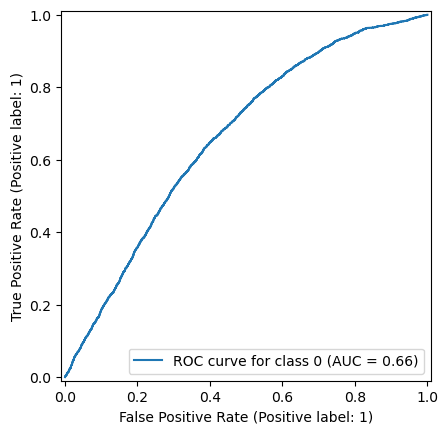

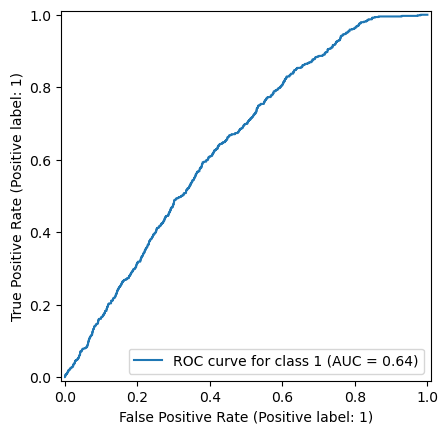

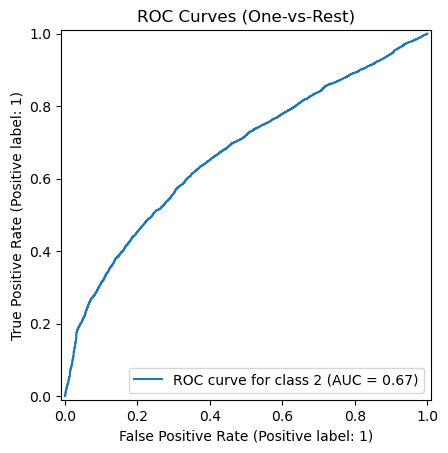

In [29]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# For multi-class problems, we need to use a one-vs-rest approach
# First, binarize the output (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Create a figure to hold all ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    # Use from_predictions instead of from_estimator
    # First get the probability predictions for all classes
    y_score = best_model.predict_proba(X_test)
    
    # Use the probability for the current class
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score[:, i],  # Use the probability scores for class i
        name=f'ROC curve for class {i}'
    )
    
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Alternatively, if you want to focus on just one class:
# class_of_interest = 0  # Change this to the class you're interested in
# y_score = best_model.predict_proba(X_test)[:, class_of_interest]
# RocCurveDisplay.from_predictions(
#     y_test == class_of_interest,  # Convert to binary problem
#     y_score,  # Probability scores for the class of interest
#     name=f'ROC curve for class {class_of_interest}'
# )

In [31]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 1.0/102.4 MB 1.8 MB/s eta 0:00:58
    --------------------------------------- 1.6/102.4 MB 1.9 MB/s eta 0:00:54
    --------------------------------------- 2.4/102.4 MB 2.2 MB/s eta 0:00:45
   - -------------------------------------- 2.9/102.4 MB 2.3 MB/s eta 0:00:44
   - -------------------------------------- 3.9/102.4 MB 2.6 MB/s eta 0:00:38
   -- ------------------------------------- 5.2/102.4 MB 3.1 MB/s eta 0:00:32
   -- ------------------------------------- 6.8/102.4 MB 3.6 MB/s eta 0:00:27
   --- ------------------------------------ 8.1/102.4 MB 3.9 MB/s eta 0:00:25
   --- ------------------------------------ 9.7/102.4 MB 4.2 MB/s eta 0:00:22
   ----

In [32]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

In [34]:
model.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

if hasattr(model, "predict_proba"):
    y_proba = pipeline.predict_proba(X_test)
else:
    y_proba = model.decision_function(X_test)

# Ensure proper numpy array for metrics
y_test_int = np.array(y_test, dtype=int)
y_pred_int = np.array(y_pred, dtype=int)

# Compute metrics
accuracy = accuracy_score(y_test_int, y_pred_int)

# ROC-AUC calculation (handle multiclass automatically)
if y_proba.ndim == 1 or y_proba.shape[1] == 2:
    # Binary classification: take probability of positive class
    roc = roc_auc_score(y_test_int, y_proba[:, 1] if y_proba.ndim > 1 else y_proba)
else:
    # Multiclass: use ovr
    roc = roc_auc_score(y_test_int, y_proba, multi_class='ovr', average='macro')

# Print metrics immediately
print(f"Model: {name}")
print(f"CV ROC-AUC: {cv_roc:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC-AUC: {roc:.4f}")
print("-" * 50)

Learning rate set to 0.097501
0:	learn: 1.0169966	total: 158ms	remaining: 2m 37s
1:	learn: 0.9526631	total: 168ms	remaining: 1m 23s
2:	learn: 0.9014636	total: 179ms	remaining: 59.4s
3:	learn: 0.8598349	total: 189ms	remaining: 47s
4:	learn: 0.8255323	total: 199ms	remaining: 39.7s
5:	learn: 0.7969831	total: 210ms	remaining: 34.7s
6:	learn: 0.7733166	total: 232ms	remaining: 32.9s
7:	learn: 0.7531810	total: 252ms	remaining: 31.3s
8:	learn: 0.7360727	total: 262ms	remaining: 28.9s
9:	learn: 0.7215369	total: 278ms	remaining: 27.6s
10:	learn: 0.7095636	total: 289ms	remaining: 26s
11:	learn: 0.6989043	total: 300ms	remaining: 24.7s
12:	learn: 0.6896555	total: 311ms	remaining: 23.6s
13:	learn: 0.6815517	total: 322ms	remaining: 22.7s
14:	learn: 0.6746603	total: 331ms	remaining: 21.8s
15:	learn: 0.6688065	total: 342ms	remaining: 21s
16:	learn: 0.6636354	total: 350ms	remaining: 20.2s
17:	learn: 0.6591520	total: 360ms	remaining: 19.6s
18:	learn: 0.6554214	total: 370ms	remaining: 19.1s
19:	learn: 0.65